In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,scale
from IPython.display import display
from sklearn.feature_selection import SelectKBest
from scipy.stats import randint
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objs as go
import statsmodels.formula.api as smf

In [6]:
def union_csv_files(folder_path, csv_files):
    df_list = []
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        print(f"Reading {file_path}")
        try:
            df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')
            df_list.append(df)
        except pd.errors.ParserError as e:
            print(f"Error reading {file_path}: {e}")
    
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

In [7]:
def read_all_csvs_in_folder(folder_path):
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    df_list = []
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        print(f"Reading {file_path}")
        try:
            df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')
            df_list.append(df)
        except pd.errors.ParserError as e:
            print(f"Error reading {file_path}: {e}")
    
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df


In [8]:
folder_path = 'D:/tcc_predictve_models/'
combined_df = read_all_csvs_in_folder(folder_path)

Reading D:/tcc_predictve_models/campeonato_brasileiro_serie_a_2013.csv
Reading D:/tcc_predictve_models/campeonato_brasileiro_serie_a_2014.csv
Reading D:/tcc_predictve_models/campeonato_brasileiro_serie_a_2015.csv
Reading D:/tcc_predictve_models/campeonato_brasileiro_serie_a_2016.csv
Reading D:/tcc_predictve_models/campeonato_brasileiro_serie_a_2017.csv
Reading D:/tcc_predictve_models/campeonato_brasileiro_serie_a_2018.csv
Reading D:/tcc_predictve_models/campeonato_brasileiro_serie_a_2019.csv
Reading D:/tcc_predictve_models/campeonato_brasileiro_serie_a_2020.csv
Reading D:/tcc_predictve_models/campeonato_brasileiro_serie_a_2021.csv
Reading D:/tcc_predictve_models/campeonato_brasileiro_serie_a_2022.csv
Reading D:/tcc_predictve_models/campeonato_brasileiro_serie_a_2023.csv
Reading D:/tcc_predictve_models/campeonato_brasileiro_serie_a_2024.csv


In [9]:
combined_df.describe()

,timestamp,attendance,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,...,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no
count,4.180000e+03,2438.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,...,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000
mean,1.535640e+09,17446.923708,19.500000,1.639758,0.937060,1.724136,1.007091,1.407895,0.952871,2.360766,...,4.831366,2.260500,3.519014,4.336639,0.774309,1.225234,2.254478,4.190703,1.149888,0.950545
std,1.001056e+08,13276.622641,10.967168,0.727374,0.578684,0.426928,0.362636,1.160647,0.979048,1.542566,...,1.573674,0.930174,0.685111,2.192441,0.702997,1.122229,2.107474,4.308431,1.047984,0.863231
min,1.369517e+09,-1.000000,1.000000,0.000000,0.000000,0.320000,0.210000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.443981e+09,7973.750000,10.000000,1.250000,0.560000,1.470000,0.740000,1.000000,0.000000,1.000000,...,4.330000,1.690000,3.200000,2.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.534980e+09,13562.500000,19.500000,1.695000,0.930000,1.740000,1.000000,1.000000,1.000000,2.000000,...,5.000000,2.100000,3.390000,3.750000,1.280000,1.850000,3.150000,4.845000,1.850000,1.560000
75%,1.625725e+09,24335.500000,29.000000,2.092500,1.300000,2.000000,1.260000,2.000000,1.000000,3.000000,...,5.670000,2.590000,3.710000,5.292500,1.420000,2.250000,4.200000,8.000000,2.100000,1.730000
max,1.701909e+09,69846.000000,38.000000,3.000000,3.000000,2.790000,2.000000,7.000000,6.000000,10.000000,...,13.000000,20.500000,10.000000,22.250000,2.500000,3.500000,8.000000,34.000000,3.200000,2.700000


In [10]:
combined_df[combined_df['status'] == 'complete'].describe()

,timestamp,attendance,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,...,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no
count,4.179000e+03,2438.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,...,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000
mean,1.535653e+09,17446.923708,19.495573,1.639751,0.937018,1.724149,1.007066,1.408232,0.953099,2.361330,...,4.831366,2.261041,3.519856,4.337676,0.774494,1.225528,2.255018,4.191706,1.150163,0.950773
std,1.001141e+08,13276.622641,10.964745,0.727461,0.578747,0.426979,0.362676,1.160582,0.979054,1.542318,...,1.573862,0.929628,0.683027,2.191676,0.702979,1.122204,2.107437,4.308459,1.047958,0.863209
min,1.369517e+09,-1.000000,1.000000,0.000000,0.000000,0.320000,0.210000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.443976e+09,7973.750000,10.000000,1.250000,0.560000,1.470000,0.740000,1.000000,0.000000,1.000000,...,4.330000,1.690000,3.200000,2.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.534982e+09,13562.500000,19.000000,1.700000,0.930000,1.740000,1.000000,1.000000,1.000000,2.000000,...,5.000000,2.100000,3.390000,3.750000,1.280000,1.850000,3.150000,4.850000,1.850000,1.560000
75%,1.625746e+09,24335.500000,29.000000,2.095000,1.300000,2.000000,1.260000,2.000000,1.000000,3.000000,...,5.670000,2.590000,3.710000,5.295000,1.420000,2.250000,4.200000,8.000000,2.100000,1.730000
max,1.701909e+09,69846.000000,38.000000,3.000000,3.000000,2.790000,2.000000,7.000000,6.000000,10.000000,...,13.000000,20.500000,10.000000,22.250000,2.500000,3.500000,8.000000,34.000000,3.200000,2.700000


In [11]:
# Export the description of the complete matches to an Excel file
description = combined_df[combined_df['status'] == 'complete'].describe()
description.to_excel('complete_matches_description.xlsx', index=True)

ModuleNotFoundError: No module named 'openpyxl'

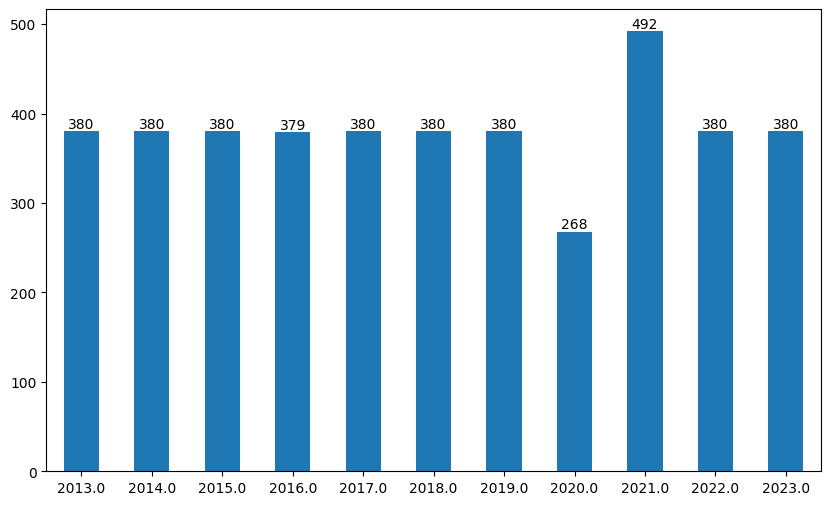

In [12]:
# Extract the year from the 'date_GMT' column with explicit format
combined_df['year'] = pd.to_datetime(combined_df['date_GMT'], format='%b %d %Y - %I:%M%p', errors='coerce').dt.year

combined_df = combined_df[combined_df['status'] == 'complete']

# Count the number of matches per year
matches_per_year = combined_df['year'].value_counts().sort_index()

# Plot the graph
plt.figure(figsize=(10, 6))
ax = matches_per_year.plot(kind='bar')
plt.xticks(rotation=0)

# Remove x-axis title
ax.set_xlabel('')

# Annotate each bar with the value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
# Display the plot
plt.show()

In [13]:
columns_to_drop = ['timestamp', 'date_GMT', 'attendance', 'referee', 'stadium_name','btts_percentage_pre_match', 'over_15_percentage_pre_match','over_25_percentage_pre_match', 'over_35_percentage_pre_match','over_45_percentage_pre_match', 'over_15_HT_FHG_percentage_pre_match','over_05_HT_FHG_percentage_pre_match','over_15_2HG_percentage_pre_match', 'over_05_2HG_percentage_pre_match', 'odds_ft_home_team_win','odds_ft_draw', 'odds_ft_away_team_win', 'odds_ft_over15','odds_ft_over25', 'odds_ft_over35', 'odds_ft_over45', 'odds_btts_yes','odds_btts_no','home_team_goal_timings','away_team_goal_timings']
combined_df.drop(columns=columns_to_drop, inplace=True)

In [14]:
combined_df['result'] = combined_df.apply(
    lambda row: (
        'home winner' if row['home_team_goal_count'] > row['away_team_goal_count'] else 
        ('away winner' if row['home_team_goal_count'] < row['away_team_goal_count'] else 'draw')
    ) if pd.notnull(row['home_team_goal_count']) and pd.notnull(row['away_team_goal_count']) else np.nan,
    axis=1
)

In [15]:
# Define the mapping
mapping = {'home winner': 0, 'away winner': 1, 'draw': 2}

# Apply the mapping to the column
combined_df['result_code'] = combined_df['result'].map(mapping)

In [16]:
matches = combined_df.shape[0]

matches_complete = combined_df[combined_df['status'] == 'complete'].shape[0]

matches_suspended = combined_df[combined_df['status'] == 'suspended'].shape[0]

matches_canceled = combined_df[combined_df['status'] == 'canceled'].shape[0]

features = len(combined_df.columns[3:])

home_win = combined_df[(combined_df['result'] == 'home winner')].shape[0]
away_win = combined_df[(combined_df['result'] == 'away winner')].shape[0]
draw = combined_df[(combined_df['result'] == 'draw')].shape[0]
val = [home_win, away_win, draw]

home_win_rate = round((home_win / matches) * 100, 2)
away_win_rate = round((away_win / matches) * 100, 2)
draw_rate = round((draw / matches) * 100, 2)


print(f'Total number of matches in the sample: {matches}')
print(f'Total number of matches complete in the sample: {matches_complete}')
print(f'Total number of matches incomplete in the sample: {matches_suspended}')
print(f'Total number of matches canceled in the sample: {matches_canceled}')
print(f'Total number of features: {features}')
print(f'Total number of home wins: {home_win}')
print(f'Total number of away wins: {away_win}')
print(f'Total number of draws: {draw}')
print(f'Home win rate: {home_win_rate}%')
print(f'Away win rate: {away_win_rate}%')
print(f'Draw rate: {draw_rate}%')

Total number of matches in the sample: 4179
Total number of matches complete in the sample: 4179
Total number of matches incomplete in the sample: 0
Total number of matches canceled in the sample: 0
Total number of features: 42
Total number of home wins: 2027
Total number of away wins: 1029
Total number of draws: 1123
Home win rate: 48.5%
Away win rate: 24.62%
Draw rate: 26.87%


In [22]:
features_numeric = combined_df.drop(['home_team_name', 'away_team_name','status','result','Game Week','Pre-Match PPG (Home)', 'Pre-Match PPG (Away)'], axis=1).copy()

In [23]:
features_numeric.head()

,home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_corner_count,away_team_corner_count,...,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,timestamp;date_GMT;status;attendance;home_team_name;away_team_name;referee;Game Week;Pre-Match PPG (Home);Pre-Match PPG (Away);home_ppg;away_ppg;home_team_goal_count;away_team_goal_count;total_goal_count;total_goals_at_half_time;home_team_goal_count_half_time;away_team_goal_count_half_time;home_team_goal_timings;away_team_goal_timings;home_team_corner_count;away_team_corner_count;home_team_yellow_cards;home_team_red_cards;away_team_yellow_cards;away_team_red_cards;home_team_first_half_cards;home_team_second_half_cards;away_team_first_half_cards;away_team_second_half_cards;home_team_shots;away_team_shots;home_team_shots_on_target;away_team_shots_on_target;home_team_shots_off_target;away_team_shots_off_target;home_team_fouls;away_team_fouls;home_team_possession;away_team_possession;Home Team Pre-Match xG;Away Team Pre-Match xG;team_a_xg;team_b_xg;average_goals_per_match_pre_match;btts_percentage_pre_match;over_15_percentage_pre_match;over_25_percentage_pre_match;over_35_percentage_pre_match;over_45_percentage_pre_match;over_15_HT_FHG_percentage_pre_match;over_05_HT_FHG_percentage_pre_match;over_15_2HG_percentage_pre_match;over_05_2HG_percentage_pre_match;average_corners_per_match_pre_match;average_cards_per_match_pre_match;odds_ft_home_team_win;odds_ft_draw;odds_ft_away_team_win;odds_ft_over15;odds_ft_over25;odds_ft_over35;odds_ft_over45;odds_btts_yes;odds_btts_no;stadium_name,year,result_code
0,1.53,0.74,1.0,0.0,1.0,0.0,0.0,0.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2013.0,0
1,2.05,1.05,2.0,2.0,4.0,3.0,2.0,1.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2013.0,2
2,1.74,1.21,1.0,1.0,2.0,1.0,0.0,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2013.0,2
3,2.11,0.42,2.0,0.0,2.0,1.0,1.0,0.0,10.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2013.0,0
4,1.16,1.21,0.0,2.0,2.0,2.0,0.0,2.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2013.0,1


In [18]:
def drop_rows_with_negatives(df):
    df_cleaned = df[(df >= 0).all(axis=1)]
    return df_cleaned

In [19]:
features = drop_rows_with_negatives(features_numeric)

In [20]:
labels = features['result_code']

In [21]:
from scipy.stats import chi2_contingency

# Check if labels is not empty
if not labels.empty:
    # Observed frequencies
    observed = labels.value_counts().values

    # Create a contingency table
    contingency_table = np.array([observed, observed.sum() - observed])
    total = sum(observed)
    expected = [total * (count / total) for count in observed]

    # Chi-Square test
    chi2, p, dof, ex = chi2_contingency([observed, expected])

    print(f"Chi-Square Statistic: {chi2:.2f}")
    print(f"P-value: {p:.5f}")

    if p < 0.05:
        print("Sample is imbalanced")
    else:
        print("Sample is balanced")
else:
    print("Labels are empty. Cannot perform chi-square test.")

Labels are empty. Cannot perform chi-square test.


In [ ]:
features_complete = features.drop(['status_code','result_code',], axis=1)

In [ ]:
print(f"Length of x: {len(features_complete)}")
print(f"Length of y: {len(labels)}")

Length of x: 0
Length of y: 0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Adding constant for VIF calculation
X = sm.add_constant(features_complete)

# Calculating VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

c:\Users\thale\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
# Filter the VIF DataFrame to show only columns with VIF score of infinity
vif_inf = vif[vif['VIF'] == float('inf')]
print(vif_inf)

                           Feature  VIF
3             home_team_goal_count  inf
4             away_team_goal_count  inf
5                 total_goal_count  inf
6         total_goals_at_half_time  inf
7   home_team_goal_count_half_time  inf
8   away_team_goal_count_half_time  inf
11          home_team_yellow_cards  inf
12             home_team_red_cards  inf
13          away_team_yellow_cards  inf
14             away_team_red_cards  inf
15      home_team_first_half_cards  inf
16     home_team_second_half_cards  inf
17      away_team_first_half_cards  inf
18     away_team_second_half_cards  inf
19                 home_team_shots  inf
20                 away_team_shots  inf
21       home_team_shots_on_target  inf
22       away_team_shots_on_target  inf
23      home_team_shots_off_target  inf
24      away_team_shots_off_target  inf


In [ ]:
# Apply the function to drop columns with VIF = inf
features_complete = features_complete.drop(['total_goal_count','total_goals_at_half_time','home_team_goal_count_half_time','away_team_goal_count_half_time','home_team_first_half_cards','home_team_second_half_cards','away_team_first_half_cards','away_team_second_half_cards','home_team_shots_off_target','away_team_shots_off_target','year'], axis=1)

In [ ]:
# Select the 'home_team_name' and 'away_team_name' columns from combined_df
team_names = combined_df.loc[combined_df['status_code'] == 0, ['home_team_name', 'away_team_name', 'result_code']].copy()

# Reset the index of team_names to ensure alignment with testing_set
team_names.reset_index(drop=True, inplace=True)

# Reset the index of testing_set to ensure alignment with team_names
features_complete.reset_index(drop=True, inplace=True)

# Concatenate the team names with the testing set
testing_set = pd.concat([features_complete, team_names], axis=1)

# Display the resulting DataFrame
display(testing_set.head())

,home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_corner_count,away_team_corner_count,...,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,year,home_team_name,away_team_name,result_code
0,1.53,0.74,1.0,0.0,1.0,0.0,0.0,0.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2013.0,Vasco da Gama,Portuguesa,0
1,2.05,1.05,2.0,2.0,4.0,3.0,2.0,1.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2013.0,Vitória,Internacional,2
2,1.74,1.21,1.0,1.0,2.0,1.0,0.0,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2013.0,Corinthians,Botafogo,2
3,2.11,0.42,2.0,0.0,2.0,1.0,1.0,0.0,10.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2013.0,Grêmio,Náutico,0
4,1.16,1.21,0.0,2.0,2.0,2.0,0.0,2.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2013.0,Ponte Preta,São Paulo,1


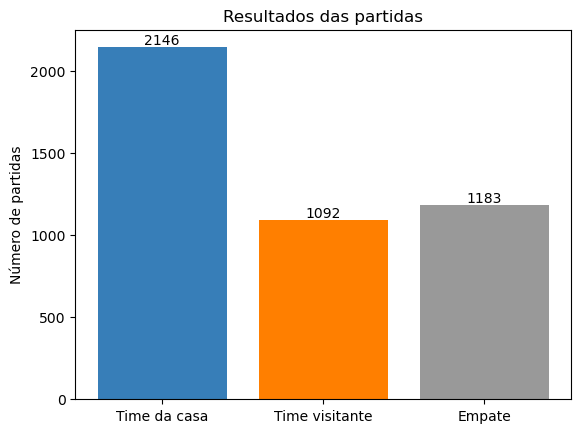

In [ ]:


# Calculate percentages
total = home_win + away_win + draw
home_win_percent = (home_win / total) * 100
away_win_percent = (away_win / total) * 100
draw_percent = (draw / total) * 100

# Plotting the bar graph using matplotlib
fig, ax1 = plt.subplots()

# Bar plot for the number of wins and draws
bars = ax1.bar(['Time da casa', 'Time visitante', 'Empate'], [home_win, away_win, draw], color=['#377eb8', '#ff7f00', '#999999'])

# Adding labels and title
ax1.set_ylabel('Número de partidas')
ax1.set_title('Resultados das partidas')

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Display the plot
plt.show()

In [ ]:
# Drop rows with empty cells in the features dataframe
testing_set.dropna(inplace=True)

In [ ]:
# Dummy encode the 'home_team_code' and 'away_team_code' columns
dummies = pd.get_dummies(testing_set[['home_team_name', 'away_team_name']], prefix=['home_team', 'away_team'], drop_first=True)

# Convert dummy variables to 0 and 1
dummies = dummies.astype(int)

# Drop the original columns and concatenate the dummy variables
testing_set = pd.concat([testing_set.drop(['home_team_name', 'away_team_name'], axis=1), dummies], axis=1)

In [ ]:
import unicodedata
import re


def clean_column_names(df):
    def clean_name(name):
        # Convert to lowercase
        name = name.lower()
        # Replace spaces with underscores
        name = name.replace(' ', '_')
        # Remove accents
        name = ''.join(
            (c for c in unicodedata.normalize('NFD', name) 
            if unicodedata.category(c) != 'Mn')
        )
        # Replace any remaining non-alphanumeric characters with underscores
        name = re.sub(r'\W+', '_', name)
        return name

    # Apply the cleaning function to all column names
    df.columns = [clean_name(col) for col in df.columns]
    return df

In [ ]:
# Apply the function to the DataFrame
testing_set = clean_column_names(testing_set)

In [ ]:
# Export the testing set to an Excel file
features.to_excel('testing_set.xlsx', index=False)

In [ ]:
home_winners = testing_set[testing_set['result_code'] == 0]
away_winners = testing_set[testing_set['result_code'] == 1]
draws = testing_set[testing_set['result_code'] == 2]

In [ ]:
from sklearn.utils import resample

home_winners_undersampled = resample(home_winners, 
                                     replace=False,    # sample without replacement
                                     n_samples=len(draws), # match number of draws
                                     random_state=42)  # reproducible results


In [ ]:
undersampled_df = pd.concat([home_winners_undersampled, away_winners, draws])

In [ ]:
undersampled_df.dropna(inplace=True)

In [ ]:
labels = undersampled_df['result_code'].copy()
features = undersampled_df.drop(['result_code','team_a_xg','team_b_xg'], axis=1).copy()

In [ ]:
# Count the values in the labels
label_counts = labels.value_counts()
print(label_counts)

result_code
0    1178
2    1178
1    1085
Name: count, dtype: int64


In [ ]:
# Export the labels and features to an Excel file
with pd.ExcelWriter('labels_and_features.xlsx', engine='xlsxwriter') as writer:
    labels.to_excel(writer, sheet_name='Labels', index=False)
    features.to_excel(writer, sheet_name='Features', index=False)

In [ ]:
print(f"Length of x: {len(features)}")
print(f"Length of y: {len(labels)}")

Length of x: 3441
Length of y: 3441


In [ ]:
# In[ ]: Estimação do modelo logístico multinomial

from statsmodels.discrete.discrete_model import MNLogit

x = features
y = labels

# Ensure all columns are numeric
x = x.apply(pd.to_numeric, errors='coerce')

X = sm.add_constant(x)

#Estimação do modelo - função 'MNLogit' do pacote
#'statsmodels.discrete.discrete_model'
model_predict = MNLogit(endog=y, exog=X).fit()

#Parâmetros do modelo
model_predict.summary()

         Current function value: 1.000420
         Iterations: 35


c:\Users\thale\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            result_code   No. Observations:                 3441
Model:                        MNLogit   Df Residuals:                     3253
Method:                           MLE   Df Model:                          186
Date:                Wed, 16 Oct 2024   Pseudo R-squ.:                 0.08877
Time:                        17:05:19   Log-Likelihood:                -3442.4
converged:                      False   LL-Null:                       -3777.8
Covariance Type:            nonrobust   LLR p-value:                 5.637e-56
=======================================================================================================
                      result_code=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 863.0982   8526.687      0.101      0.919   -1.58e+04    1.76e+04
home_ppg                                0.0177      0.124      0.143      0.887      -0.226       0.261
away_ppg                                0.1408      0.143      0.984      0.325      -0.140       0.421
home_team_goal_count                   -0.3431      0.048     -7.098      0.000      -0.438      -0.248
away_team_goal_count                    0.5240      0.057      9.271      0.000       0.413       0.635
home_team_corner_count                 -0.0089      0.018     -0.503      0.615      -0.043       0.026
away_team_corner_count                  0.0009      0.021      0.043      0.966      -0.039       0.041
home_team_yellow_cards                  0.0165      0.036      0.459      0.646      -0.054       0.087
home_team_red_cards                     0.1105      0.141      0.781      0.435      -0.167       0.388
away_team_yellow_cards                 -0.0118      0.034     -0.342      0.732      -0.079       0.056
away_team_red_cards                    -0.3807      0.123     -3.099      0.002      -0.621      -0.140
home_team_shots                         0.0312      0.014      2.240      0.025       0.004       0.058
away_team_shots                         0.0081      0.014      0.563      0.573      -0.020       0.036
home_team_shots_on_target               0.0643      0.026      2.470      0.014       0.013       0.115
away_team_shots_on_target              -0.0752      0.028     -2.662      0.008      -0.131      -0.020
home_team_fouls                        -0.0173      0.011     -1.560      0.119      -0.039       0.004
away_team_fouls                         0.0227      0.011      2.086      0.037       0.001       0.044
home_team_possession                   -8.6363     85.267     -0.101      0.919    -175.756     158.484
away_team_possession                   -8.6376     85.267     -0.101      0.919    -175.758     158.482
home_team_pre_match_xg                  0.1725      0.172      1.003      0.316      -0.164       0.509
away_team_pre_match_xg                 -0.1916      0.213     -0.901      0.367      -0.608       0.225
average_goals_per_match_pre_match       0.0560      0.086      0.650      0.516      -0.113       0.225
average_corners_per_match_pre_match    -0.0221      0.021     -1.075      0.282      -0.062       0.018
average_cards_per_match_pre_match       0.0279      0.038      0.740      0.459      -0.046       0.102
home_team_atletico_go                   0.2539      0.514      0.494      0.621      -0.753       1.261
home_team_atletico_mineiro             -1.5576      0.389     -4.008      0.000      -2.319      -0.796
home_team_atletico_pr                  -1.6911      0.395     -4.284      0.000      -2.465      -0.917
home_team_avai                         -0.1311      0.492     -0.266      0.790      -1.096       0.834
home_team_bahia  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

def random_forest_model(features, labels):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
    
    # Initialize and train the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = rf_model.predict(X_test)
    
    # Generate and print the classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    
    # Print the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    
    return rf_model, report, accuracy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\thale\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.47      0.52       388
           1       0.47      0.47      0.47       299
           2       0.44      0.54      0.49       346

    accuracy                           0.49      1033
   macro avg       0.50      0.49      0.49      1033
weighted avg       0.50      0.49      0.49      1033

Accuracy: 0.49


In [ ]:
# Create a new dataframe from the testing set, dropping the specified columns
significant_features = undersampled_df.drop(columns=[
    'home_ppg', 'away_ppg', 'home_team_corner_count', 'away_team_corner_count',
    'home_team_yellow_cards', 'home_team_red_cards', 'away_team_yellow_cards',
    'away_team_shots', 'home_team_fouls', 'home_team_possession', 
    'away_team_possession', 'home_team_pre_match_xg', 'away_team_pre_match_xg',
    'average_goals_per_match_pre_match', 'average_corners_per_match_pre_match',
    'average_cards_per_match_pre_match','result_code','team_a_xg','team_b_xg'
]).copy()

# Display the resulting DataFrame
display(significant_features.head())

,home_team_goal_count,away_team_goal_count,away_team_red_cards,home_team_shots,home_team_shots_on_target,away_team_shots_on_target,away_team_fouls,home_team_atletico_go,home_team_atletico_mineiro,home_team_atletico_pr,...,away_team_palmeiras,away_team_parana,away_team_ponte_preta,away_team_portuguesa,away_team_santa_cruz,away_team_santos,away_team_sport_recife,away_team_sao_paulo,away_team_vasco_da_gama,away_team_vitoria
580,3.0,0.0,0.0,2.0,2.0,5.0,18.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4131,2.0,1.0,0.0,5.0,3.0,6.0,8.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3480,1.0,0.0,0.0,10.0,4.0,5.0,11.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2555,2.0,0.0,0.0,26.0,14.0,5.0,16.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4172,3.0,0.0,0.0,8.0,5.0,4.0,17.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# In[ ]: Estimação do modelo logístico multinomial

from statsmodels.discrete.discrete_model import MNLogit

x = significant_features
y = labels

# Ensure all columns are numeric
x = x.apply(pd.to_numeric, errors='coerce')

X = sm.add_constant(x)

#Estimação do modelo - função 'MNLogit' do pacote
#'statsmodels.discrete.discrete_model'
model_predict = MNLogit(endog=y, exog=X).fit()

#Parâmetros do modelo
model_predict.summary()

Optimization terminated successfully.
         Current function value: 1.003525
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            result_code   No. Observations:                 3441
Model:                        MNLogit   Df Residuals:                     3285
Method:                           MLE   Df Model:                          154
Date:                Wed, 16 Oct 2024   Pseudo R-squ.:                 0.08594
Time:                        17:05:45   Log-Likelihood:                -3453.1
converged:                       True   LL-Null:                       -3777.8
Covariance Type:            nonrobust   LLR p-value:                 5.137e-62
==============================================================================================
             result_code=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.5366      0.545     -0.985      0.325      -1.604       0.531
home_team_goal_count          -0.3501      0.044     -7.897      0.000      -0.437      -0.263
away_team_goal_count           0.5398      0.052     10.459      0.000       0.439       0.641
away_team_red_cards           -0.3694      0.118     -3.136      0.002      -0.600      -0.139
home_team_shots                0.0306      0.012      2.475      0.013       0.006       0.055
home_team_shots_on_target      0.0636      0.026      2.468      0.014       0.013       0.114
away_team_shots_on_target     -0.0614      0.023     -2.729      0.006      -0.106      -0.017
away_team_fouls                0.0172      0.010      1.732      0.083      -0.002       0.037
home_team_atletico_go          0.2872      0.512      0.561      0.575      -0.717       1.291
home_team_atletico_mineiro    -1.5555      0.387     -4.020      0.000      -2.314      -0.797
home_team_atletico_pr         -1.6685      0.393     -4.245      0.000      -2.439      -0.898
home_team_avai                -0.0928      0.490     -0.190      0.850      -1.052       0.867
home_team_bahia               -0.9661      0.404     -2.390      0.017      -1.758      -0.174
home_team_botafogo            -0.8742      0.391     -2.238      0.025      -1.640      -0.109
home_team_bragantino          -1.3648      0.466     -2.930      0.003      -2.278      -0.452
home_team_csa                  0.1027      0.773      0.133      0.894      -1.413       1.619
home_team_ceara               -0.7756      0.464     -1.672      0.094      -1.685       0.133
home_team_chapecoense         -0.1597      0.433     -0.369      0.712      -1.007       0.688
home_team_corinthians         -1.8760      0.407     -4.606      0.000      -2.674      -1.078
home_team_coritiba            -0.8337      0.402     -2.072      0.038      -1.622      -0.045
home_team_criciuma            -0.8560      0.517     -1.657      0.098      -1.869       0.157
home_team_cruzeiro            -1.1915      0.413     -2.886      0.004      -2.001      -0.382
home_team_cuiaba              -0.2963      0.500     -0.593      0.553      -1.276       0.683
home_team_figueirense         -0.8454      0.508     -1.664      0.096      -1.841       0.151
home_team_flamengo            -1.5208      0.388     -3.918      0.000      -2.281      -0.760
home_team_fluminense          -1.2908      0.387     -3.333      0.001      -2.050      -0.532
home_team_fortaleza           -1.3884      0.435     -3.192      0.001      -2.241      -0.536
home_team_goias               -0.8512      0.411     -2.071      0.038      -1.657      -0.046
home_team_gremio              -1.6679      0.391     -4.266      0.000      -2.434      -0.902
home_team_internacional       -1.4939      0.402     -3.719      0.000      -2.281      -0.707
home_team_joinville           -0.6929      0.717     -0.966      0.334      -2.099       0.713
home_team_j

In [ ]:
labels = testing_set['result_code'].copy()
features = testing_set.drop(['result_code','team_a_xg','team_b_xg'], axis=1).copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.92      0.71       651
           1       0.68      0.28      0.40       320
           2       0.64      0.26      0.37       347

    accuracy                           0.59      1318
   macro avg       0.63      0.49      0.49      1318
weighted avg       0.62      0.59      0.54      1318

Accuracy: 0.59


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'features' and 'labels' are already defined
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

xgboost = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.9}
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.96      0.72       651
           1       0.70      0.27      0.38       320
           2       0.86      0.30      0.45       347

    accuracy                           0.62      1318
   macro avg       0.71      0.51      0.52      1318
weighted avg       0.68      0.62      0.57      1318

Accuracy: 0.62
